### Exercises

Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use the iris database to answer the following quesitons:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from env import host, user, password
from pydataset import data

%config InlineBackend.figure_format = 'retina'

In [2]:
def get_db_url(db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
def sql(tbl):
    return f'SELECT * FROM {tbl}'

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. What does the distribution of petal lengths look like?

#### NOTES: 
* The majority of petal lengths are short
* count is fairly even across +/- 2, 3 to 3.5, and 6.5 to 7
* similarly even across +/- 4 and between 5 to 6.5
* The second largest peak in Count occurs between 4.5 to 5

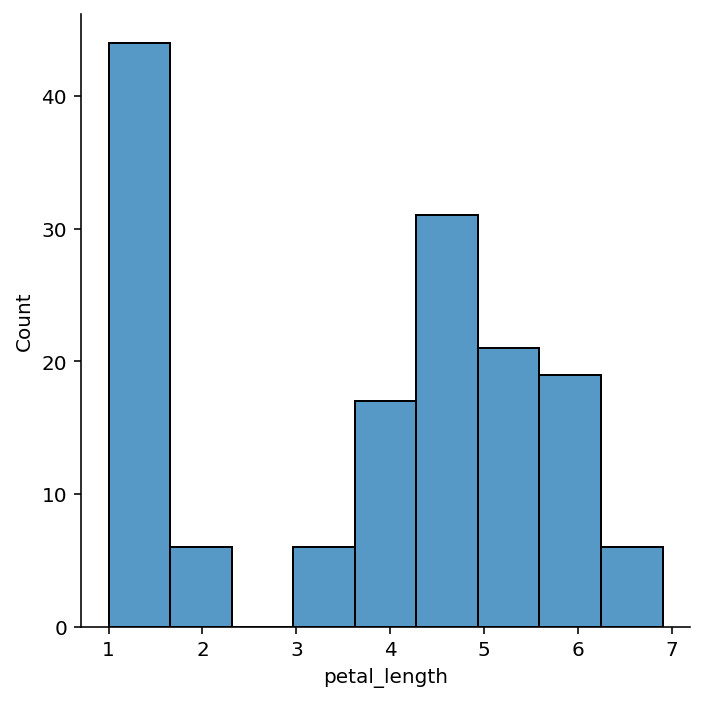

In [11]:
sns.displot(data = iris, x = 'petal_length', kde = False, rug= False)

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

#### NOTES:

* Length and Width appear to be closely correlated

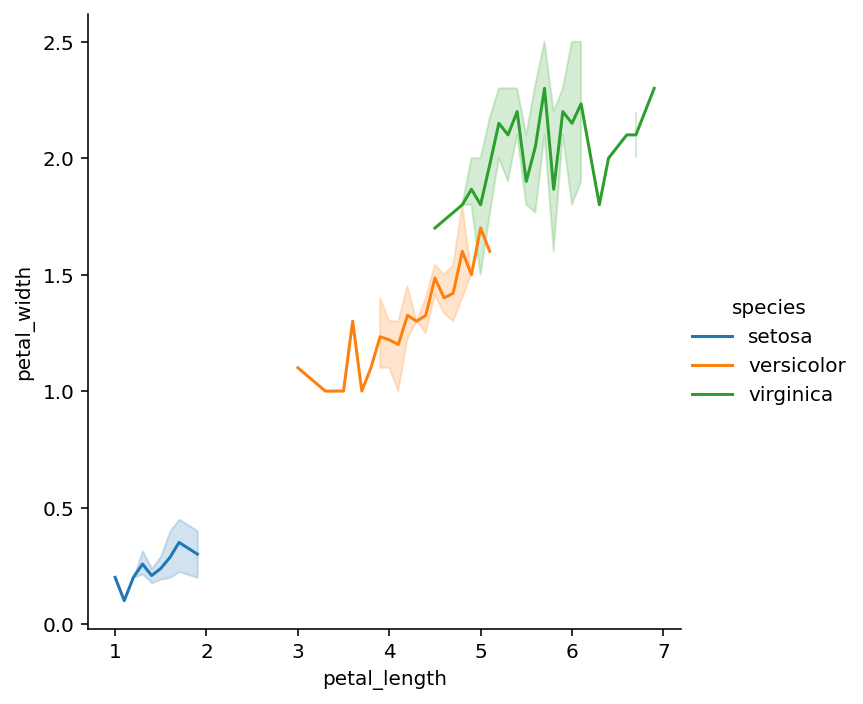

In [12]:
# plt.scatter(iris.petal_length, iris.petal_width)
# sns.relplot(data = iris, x = 'petal_length', y = 'petal_width')
# plt.scatter(iris.petal_length, iris.petal_width)
# sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', kind = 'line')
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', kind = 'line',hue = 'species')

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

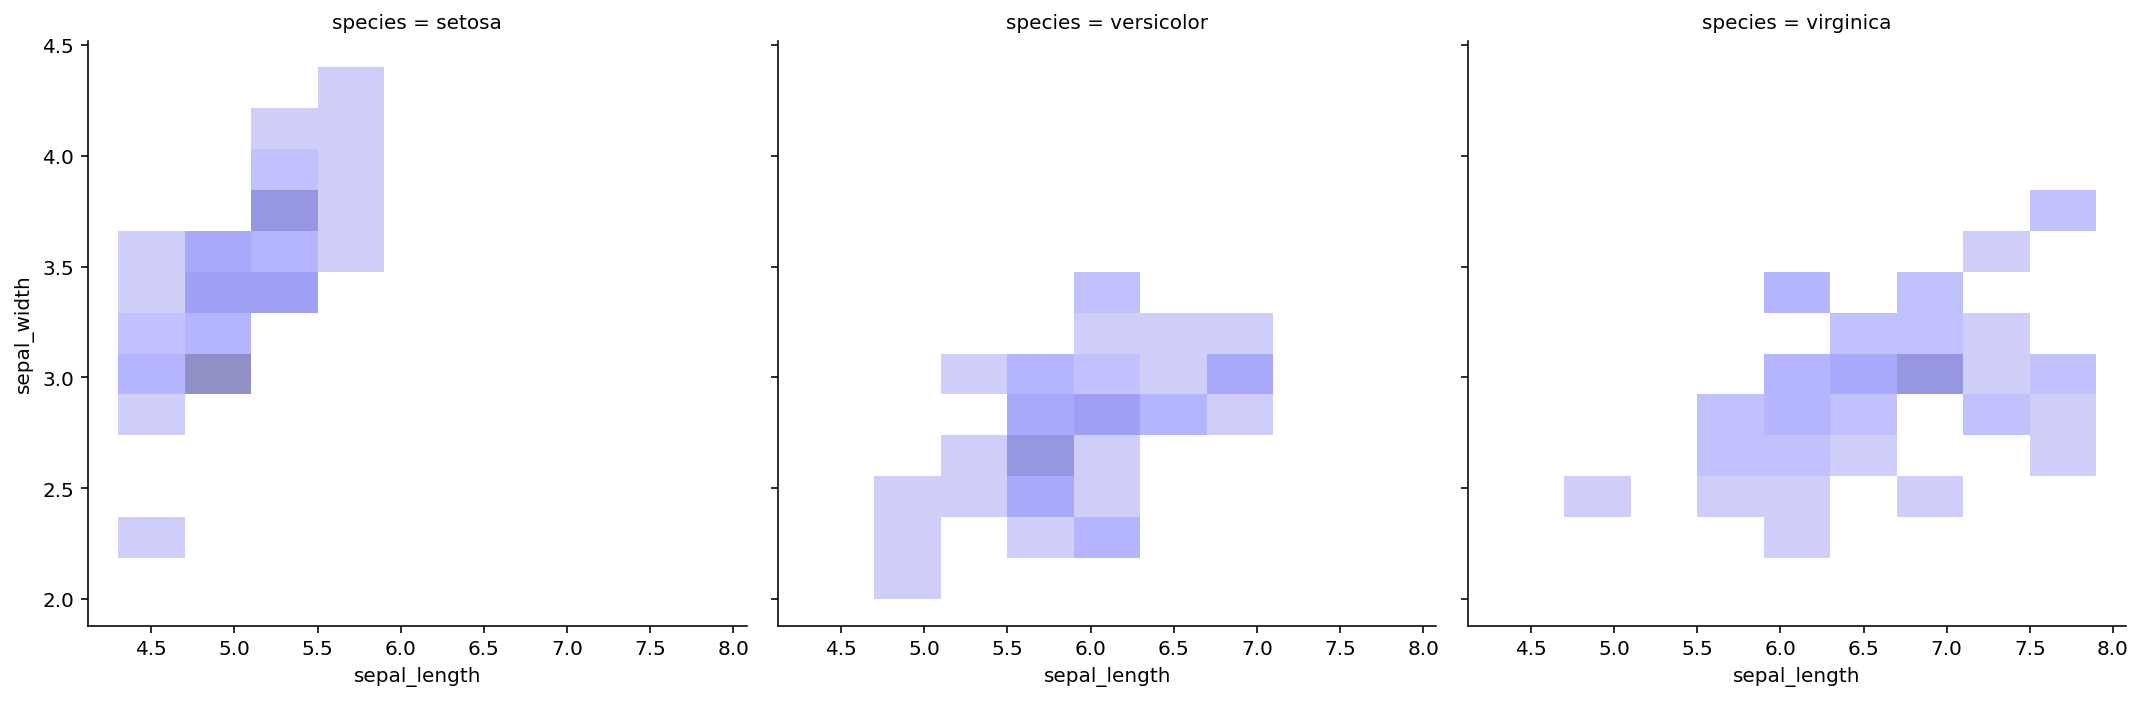

In [13]:
# sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width')
sns.displot(data = iris, x = 'sepal_length', y = 'sepal_width', col = 'species', color = 'blue', alpha = 0.6)

4. Which features would be best used to predict species?

#### NOTES:

* Petals are much better for prediction of species than Sepals

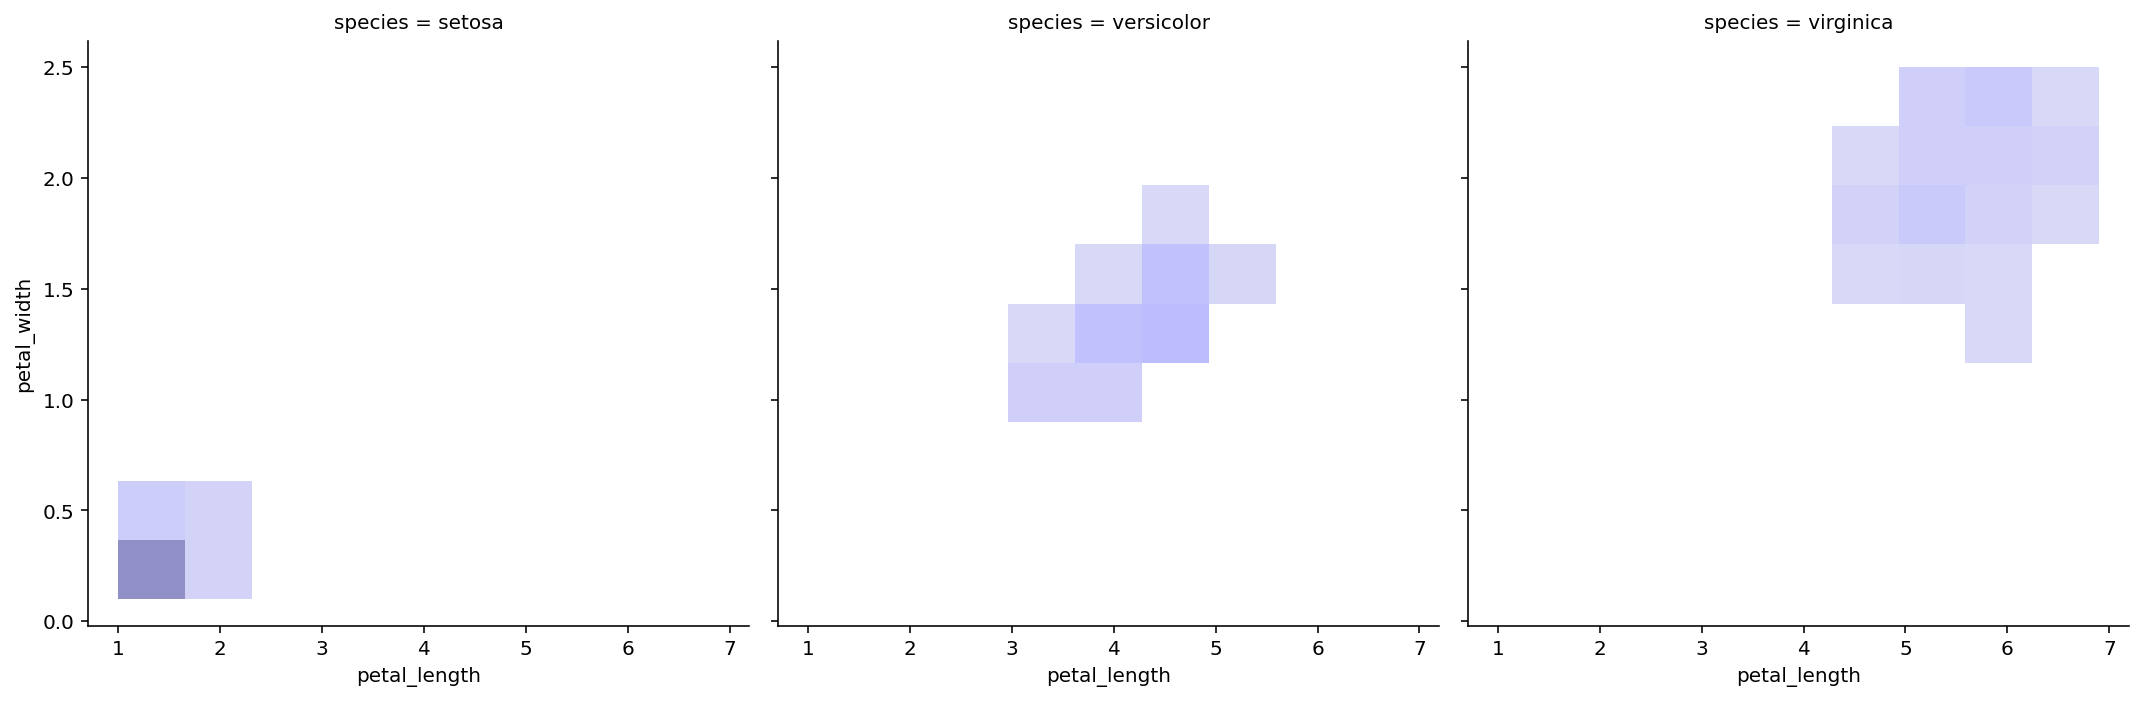

In [14]:
sns.displot(data = iris, x = 'petal_length', y = 'petal_width', col = 'species', color = 'blue', alpha = 0.6)

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

### ANSWER:

* The summary statistics are nearly identical for all datasets yet they graph out significantly different.

In [15]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [16]:
ans.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [17]:
ans.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

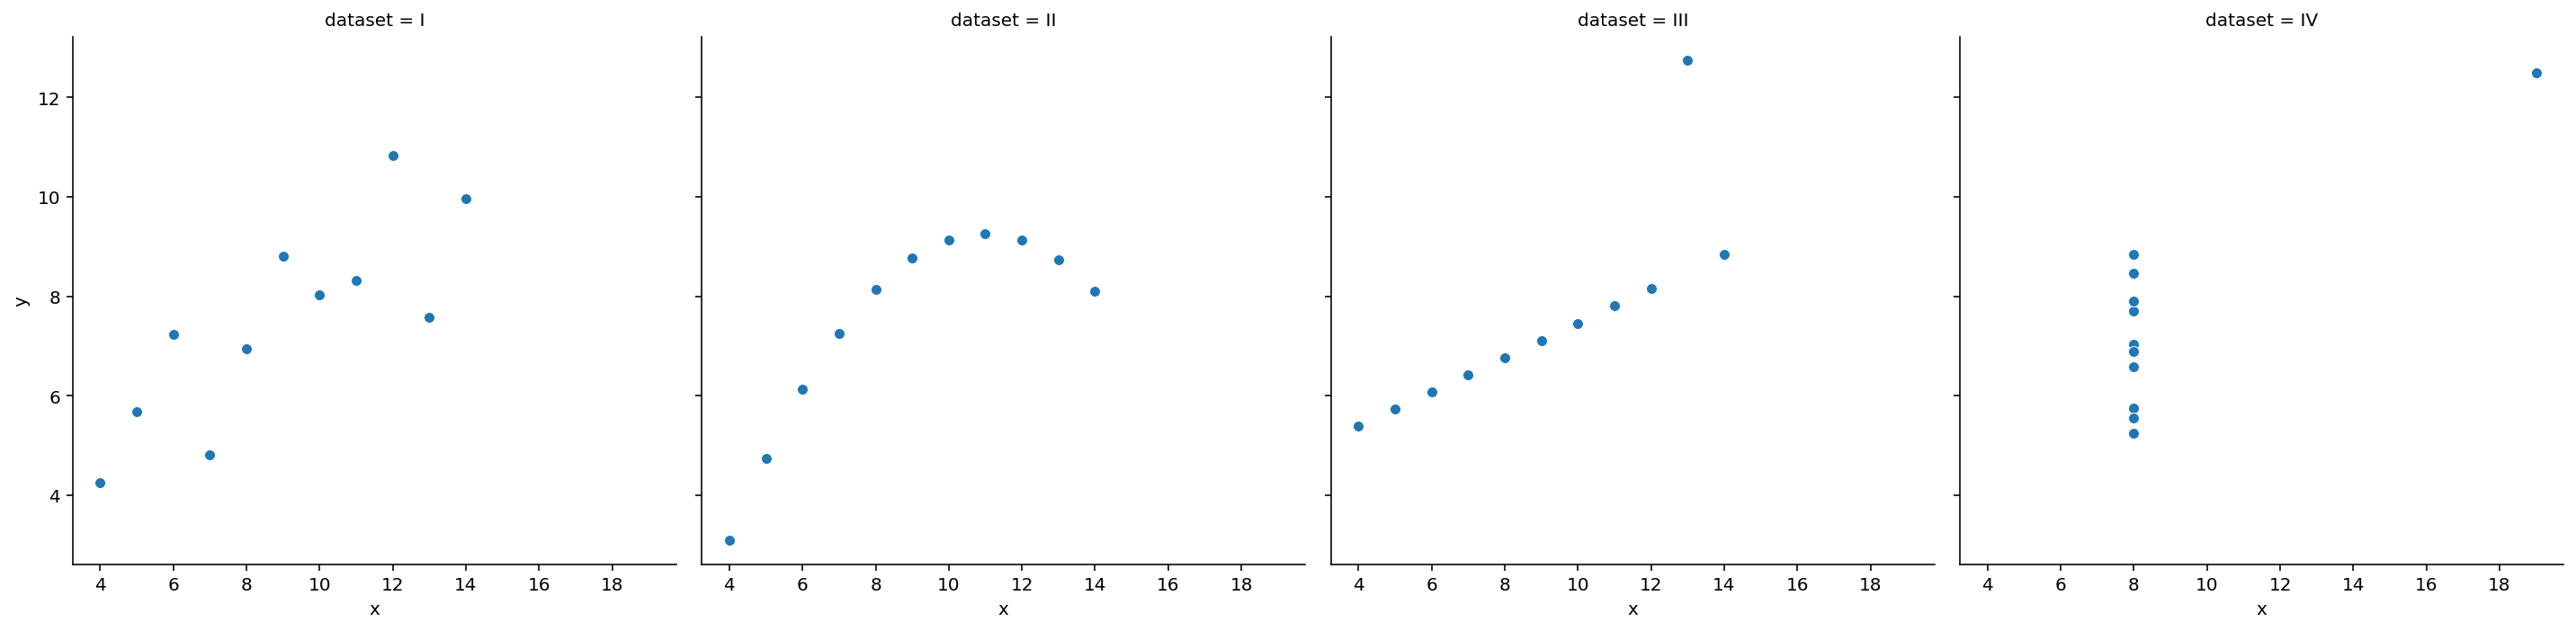

In [18]:
sns.relplot(data = ans, x = 'x', y = 'y', col = 'dataset')

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [19]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)
InsectSprays.head()

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


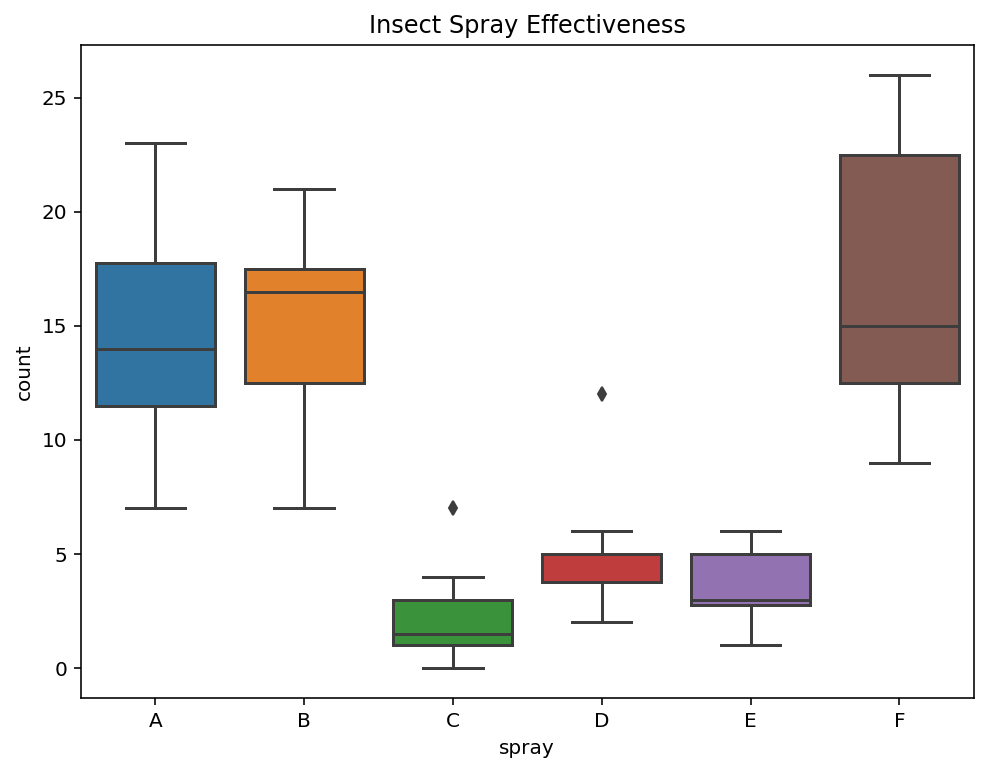

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'count', data = InsectSprays, x = 'spray')
plt.title('Insect Spray Effectiveness')
plt.show()

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

* Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
* Does whether or not a province is Catholic influence fertility?
* What measure correlates most strongly with fertility?

### ANSWER:

* High Fertility rates certainly do appear to correlate with provinces that have a higher Catholic percentage.
* The strongest measure that correlates with Fertility is Education with a Negative 0.66

In [21]:
swiss = data('swiss')
data('swiss', show_doc = True)
swiss.head()

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [22]:
is_catholic = swiss.Catholic >= 80
is_catholic.head()

Courtelary      False
Delemont         True
Franches-Mnt     True
Moutier         False
Neuveville      False
Name: Catholic, dtype: bool

In [23]:
swiss['is_catholic'] = swiss['Catholic'] >= 80
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


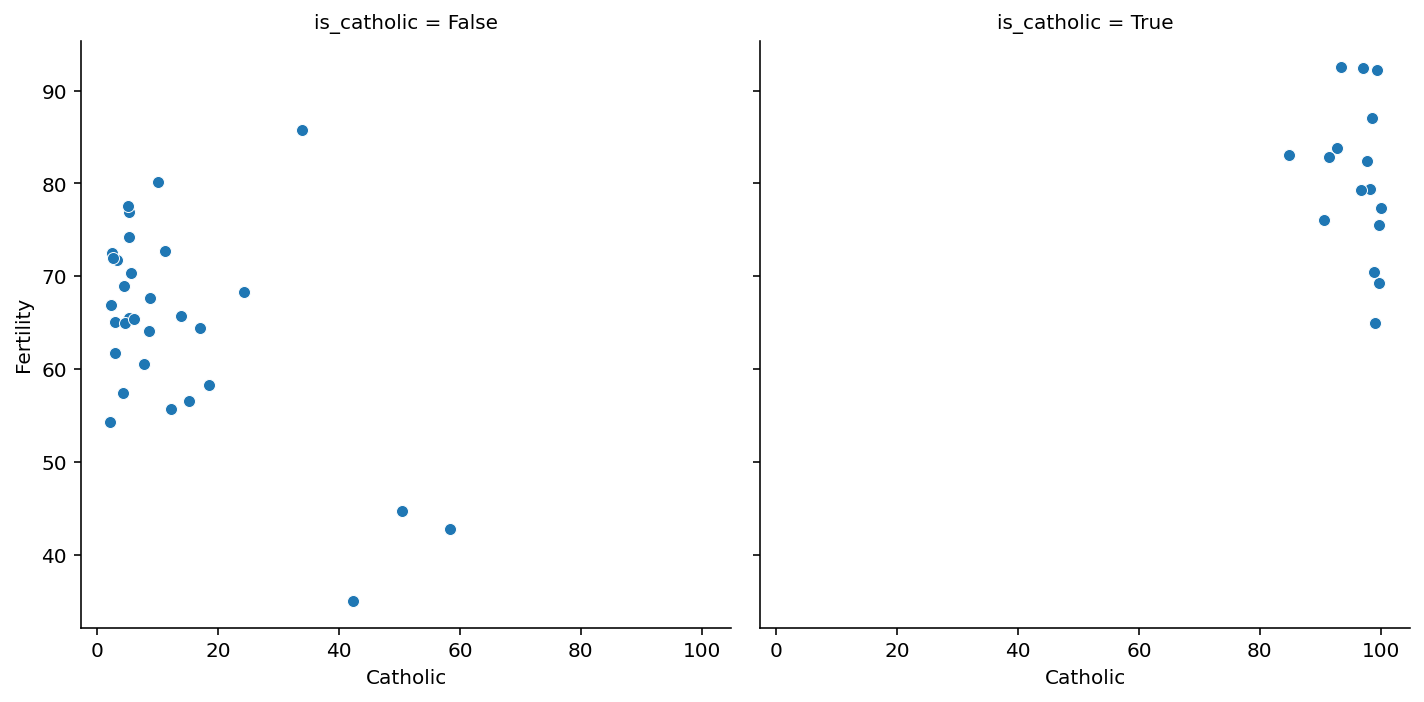

In [24]:
sns.relplot(data = swiss, x = 'Catholic', y = 'Fertility', col = 'is_catholic')

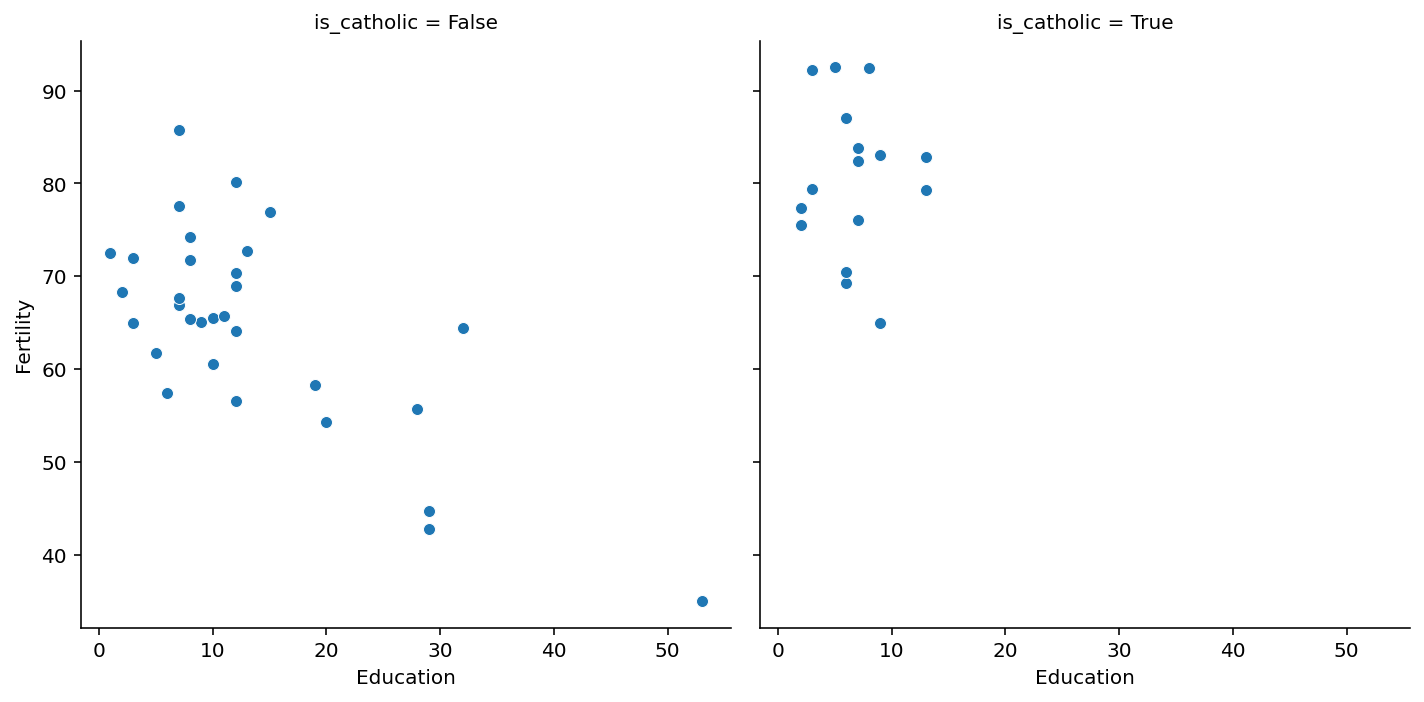

In [25]:
sns.relplot(data = swiss, x = 'Education', y = 'Fertility', col = 'is_catholic')

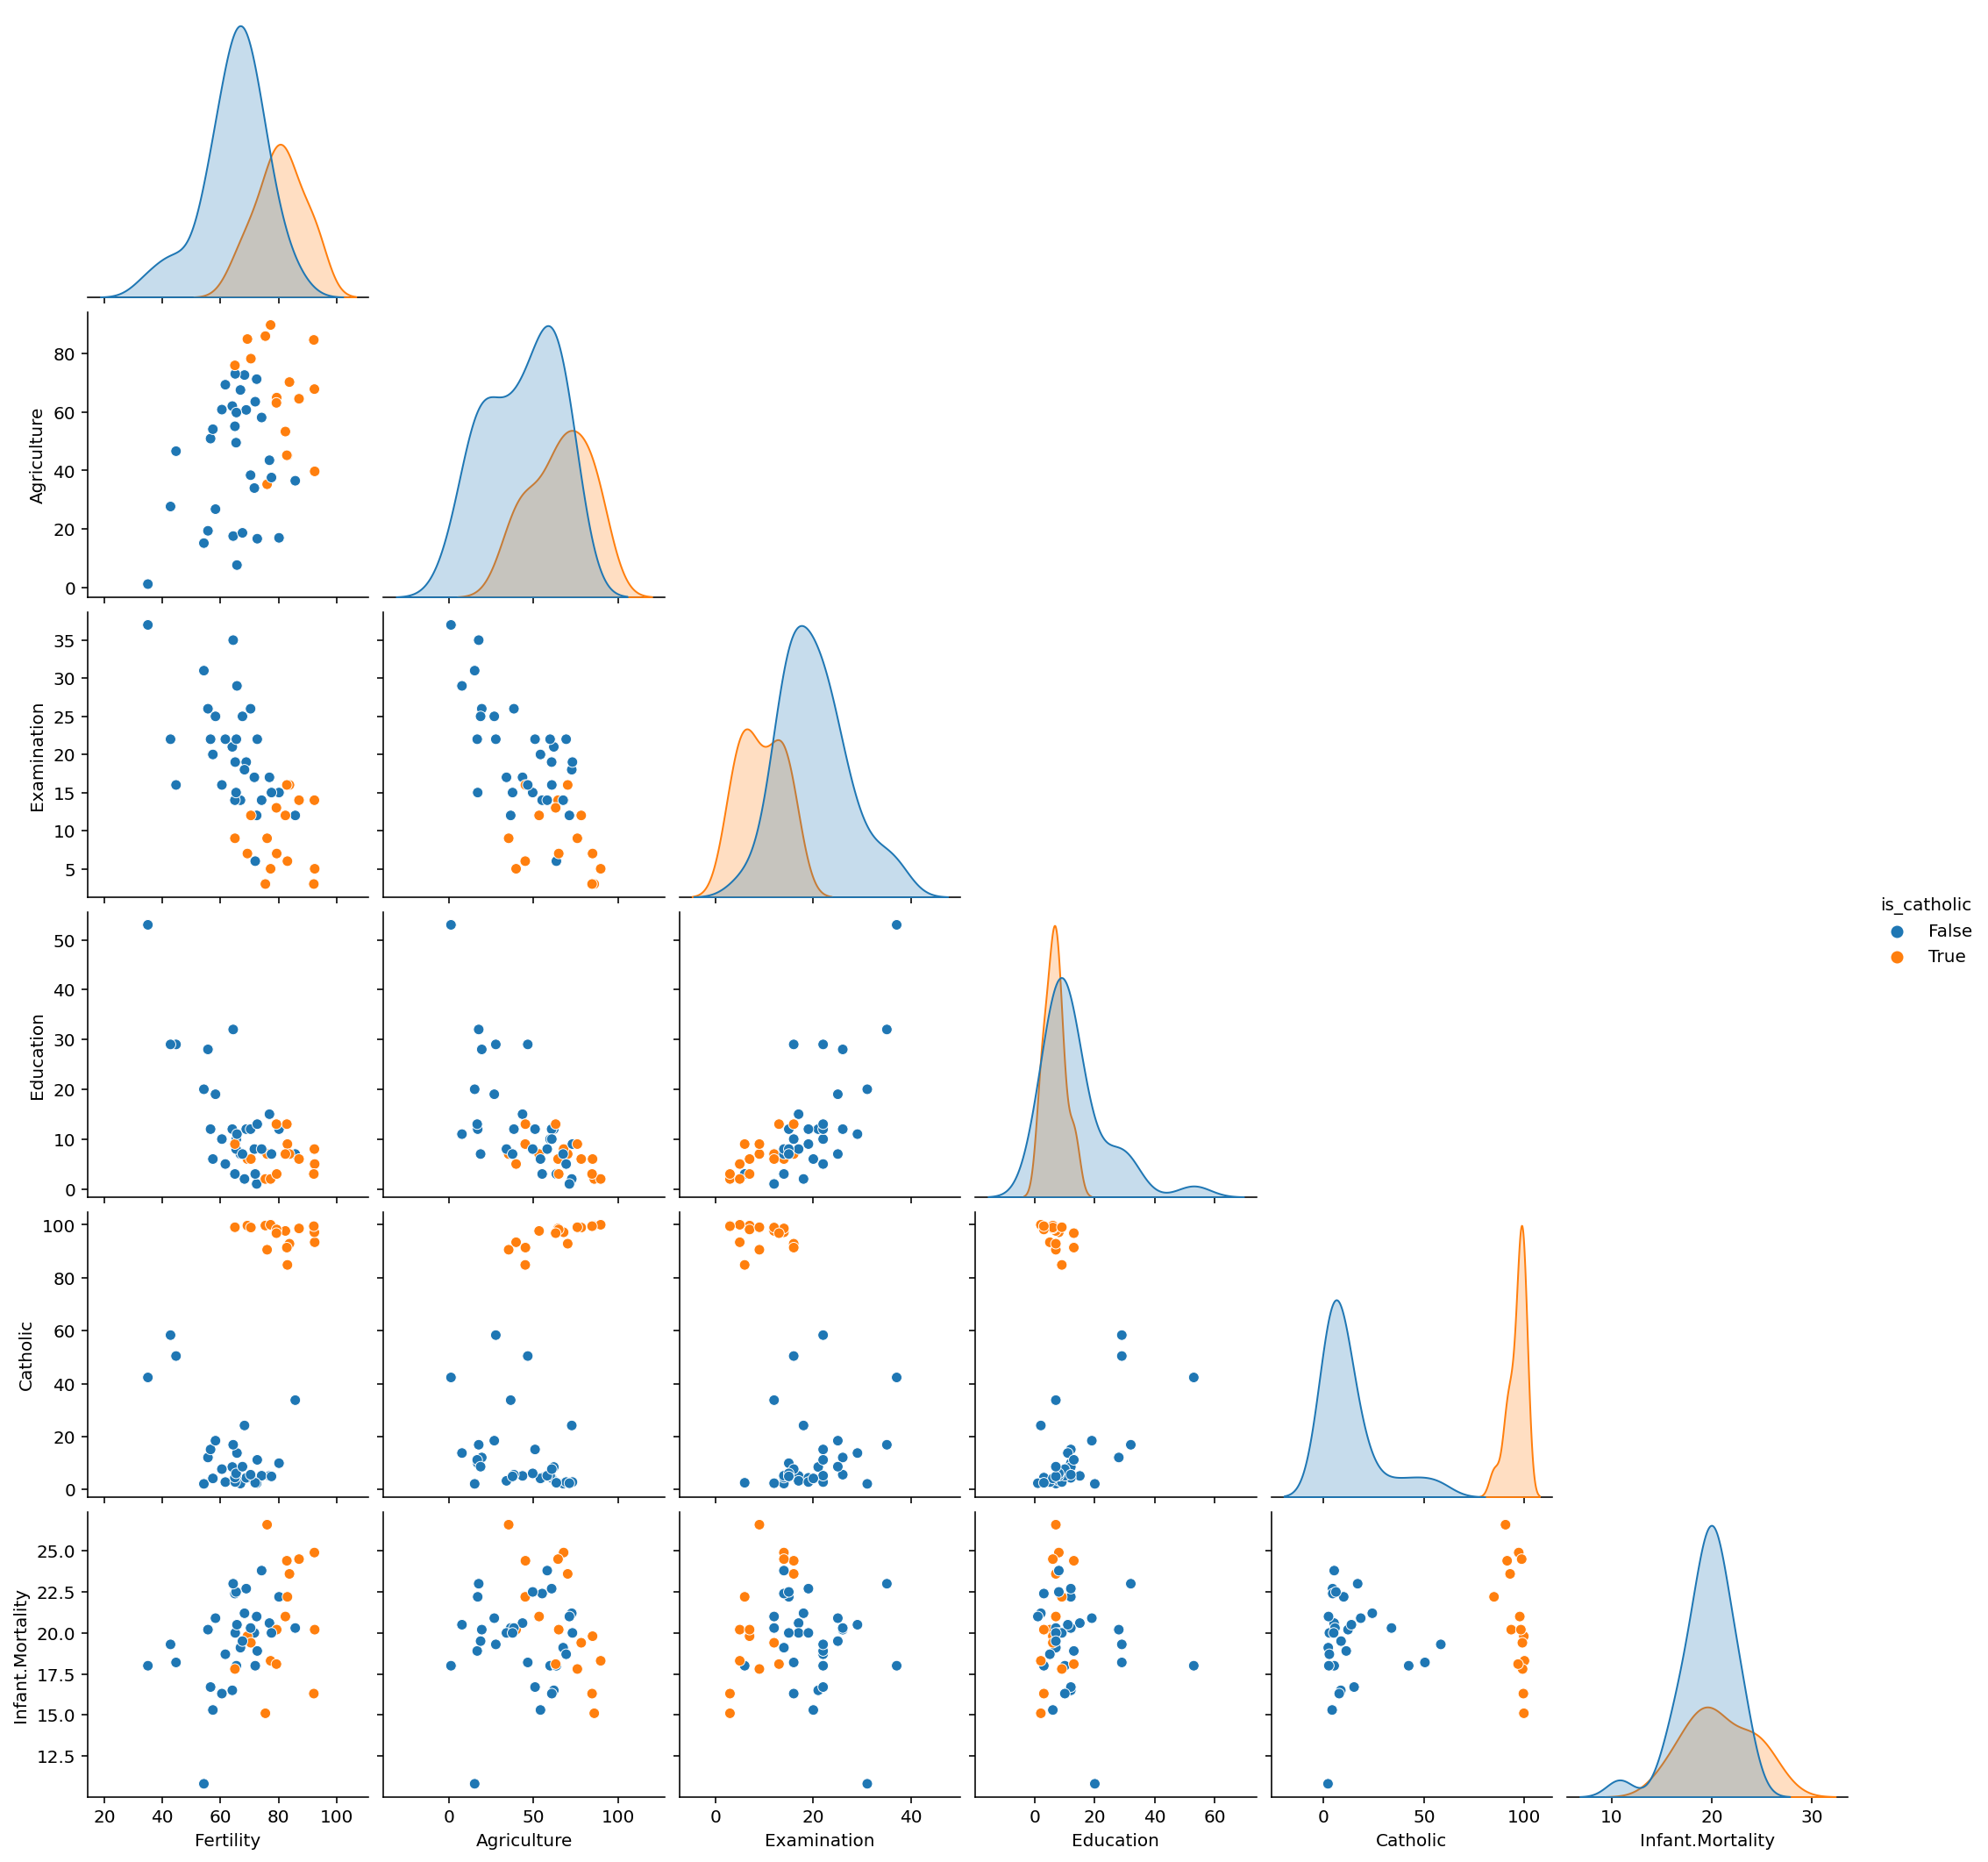

In [26]:
sns.pairplot(data = swiss, hue = 'is_catholic', corner = True)

<AxesSubplot:>

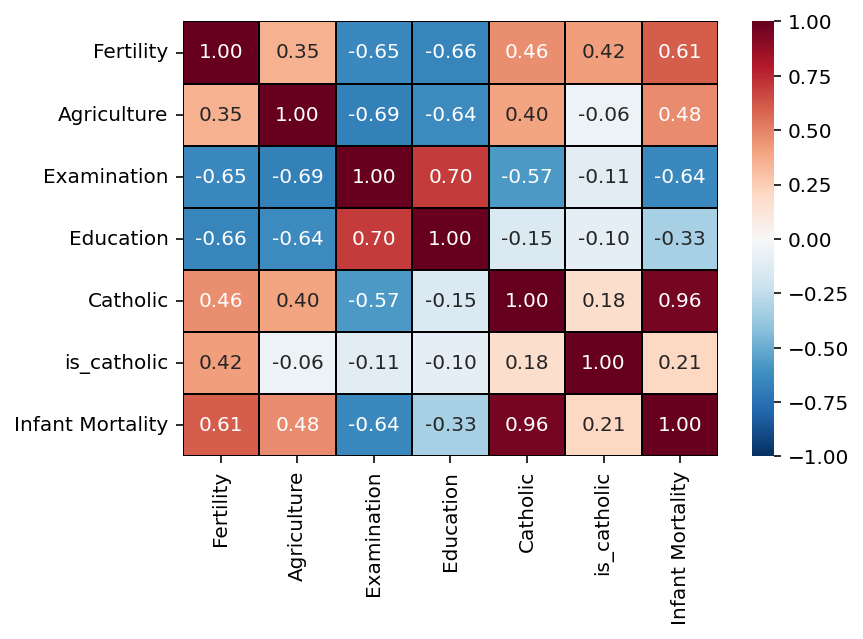

In [29]:
labels = ['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'is_catholic', 'Infant Mortality']
sns.heatmap(swiss.corr(), cmap = 'RdBu_r', annot = True, fmt = '0.2f',
           vmin = -1, vmax = 1, center = 0,
           xticklabels = labels,
           yticklabels= labels, linewidth = 1, linecolor = 'k')

In [34]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.605023
Name: Fertility, dtype: float64

### BONUS

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.